In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, GRU, SimpleRNN, Embedding, Conv1D, MaxPooling1D
from keras import optimizers,regularizers
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

/m/home/home0/04/khandas1/data/Desktop/mtp/decisions-from-experience/env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
def create_dataset(data, n_steps):
    X_train, Y_train= list(), list()
    final_choices = [x[-1] for x in data]
    features = [x[:-1] for x in data]
    # making training data 
    count = 0
    for feat,f_choice in zip(features, final_choices):
        if(len(feat)//2 <= n_steps):
            X_train.append(feat)
            Y_train.append(f_choice)
            count += 1
        else:
            for i in range(len(feat)//2-n_steps):
                end_idx = 2*(i+n_steps)
                X_train.append(feat[2*i:end_idx])
                Y_train.append(feat[end_idx])
            X_train.append(feat[(len(feat)-2*n_steps):len(feat)])
            Y_train.append(f_choice)
    print(count)
    return X_train, Y_train

In [3]:
def create_dataset_test(data, n_steps):
    X_test, Y_test= list(), list()
    final_choices = [x[-1] for x in data]
    features = [x[:-1] for x in data]
    # making training data 
    count = 0
    for feat,f_choice in zip(features, final_choices):
        if(len(feat)//2 <= n_steps):
            X_test.append(feat)
            Y_test.append(f_choice)
            count += 1
        else:
            X_test.append(feat[(len(feat)-2*n_steps):len(feat)])
            Y_test.append(f_choice)
    print(count)
    return X_test, Y_test

In [11]:
def normalise_outcomes(data):
    maxi = max([max(x) for x in data])
    mini = min([min(x) for x in data])
    for i in range(len(data)):
        for j in range(1,len(data[i]),2):
            data[i][j] -= mini
            data[i][j] /= (maxi-mini)

In [12]:
def parse_dataset(name, n_steps, flag):
    infile = open(name, 'r')
    lines = infile.readlines()
    data = []
    for line in lines:
        data.append([float(x) for x in line.split(',')])
#     normalise_outcomes(data)
    if(flag):
        return create_dataset(data, n_steps)
    else:
        return create_dataset_test(data, n_steps)

In [13]:
n_steps=20
X_train, y_train = parse_dataset('data/estimation_without_padding.csv',n_steps, 1)
X_test, y_test = parse_dataset('data/competition_without_padding.csv',n_steps, 0)

1008
921


In [14]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train -= 1
y_test -= 1

X_train = pad_sequences(X_train, padding='post', value=-100, dtype=float)
X_test = pad_sequences(X_test, padding='post', value=-100, dtype=float)

In [15]:
X_test[0]

array([   1. ,  -21.4,    2. ,  -22.8,    1. ,  -21.4,    1. ,  -21.4,
          1. ,  -21.4,    1. ,  -21.4,    1. ,  -21.4,    1. ,  -21.4,
       -100. , -100. , -100. , -100. , -100. , -100. , -100. , -100. ,
       -100. , -100. , -100. , -100. , -100. , -100. , -100. , -100. ,
       -100. , -100. , -100. , -100. , -100. , -100. , -100. , -100. ])

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], n_steps, 2))
X_test = np.reshape(X_test, (X_test.shape[0], n_steps, 2))

In [10]:
model = Sequential()
model.add(LSTM(10, return_sequences=False, activation='relu', input_shape=(None, X_train.shape[2])))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
X_train.shape, X_test.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


((2836, 20, 2), (1198, 20, 2))

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20)

Train on 2836 samples, validate on 1198 samples
Epoch 1/50
2836/2836 [==============================] - 5s 2ms/step - loss: 0.7734 - acc: 0.6121 - val_loss: 0.7267 - val_acc: 0.5551
Epoch 2/50
2836/2836 [==============================] - 3s 1ms/step - loss: 0.6552 - acc: 0.6283 - val_loss: 0.7190 - val_acc: 0.5384
Epoch 3/50
2836/2836 [==============================] - 4s 1ms/step - loss: 0.6367 - acc: 0.6231 - val_loss: 0.7054 - val_acc: 0.5376
Epoch 4/50
2836/2836 [==============================] - 5s 2ms/step - loss: 0.6189 - acc: 0.6312 - val_loss: 0.7153 - val_acc: 0.5342
Epoch 5/50
2836/2836 [==============================] - 4s 2ms/step - loss: 0.6129 - acc: 0.6453 - val_loss: 0.7112 - val_acc: 0.5326
Epoch 6/50
2836/2836 [==============================] - 5s 2ms/step - loss: 0.5988 - acc: 0.6492 - val_loss: 0.7187 - val_acc: 0.5292
Epoch 7/50
2836/2836 [==============================] - 4s 2ms/step - loss: 0.5898 - acc: 0.6622 - val_loss: 0.7116 - val_acc: 0.5401
Epoch 8/50
283

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 57.35%


In [14]:
%%script false
1, 59.02
2, 52.25
3, 53.01
5, 56.59
10, 57.60
20, 54.84

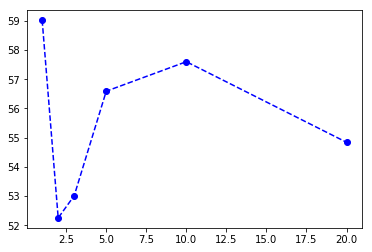

In [15]:
x=[1,2,3,5,10,20]
y=[59.02, 52.25, 53.01, 56.59, 57.60, 54.84]
plt.plot(x,y, '--bo')